In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## Create toy data set

In [2]:
num_example = 10
x_train = np.array(range(num_example))
coef = 3
bias = 2
noise = 5*(np.random.rand(num_example)-0.5)
y_train = x_train*coef+bias+noise
x_train = x_train.reshape(num_example,1).astype(np.float32)
y_train = y_train.reshape(num_example,1).astype(np.float32)

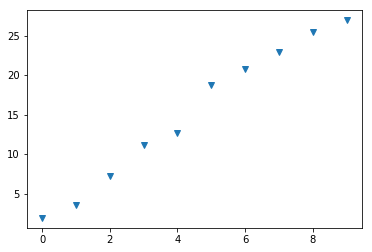

In [3]:
plt.plot(x_train, y_train, 'v')

## Train a Linear Regression model

In [4]:
model = nn.Linear(1,1)
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

Loss:81.68779754638672 at epoch: 100


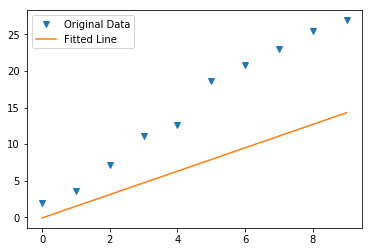

Loss:26.539581298828125 at epoch: 200


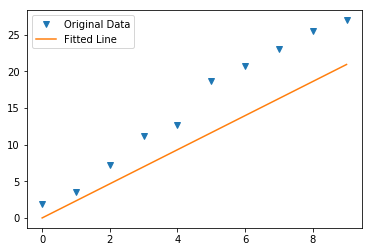

Loss:9.454655647277832 at epoch: 300


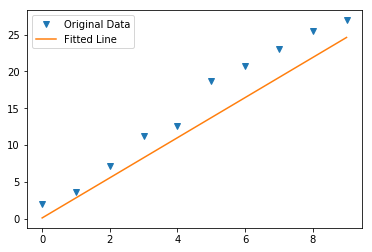

Loss:4.1581621170043945 at epoch: 400


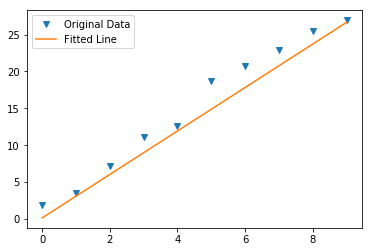

Loss:2.512695789337158 at epoch: 500


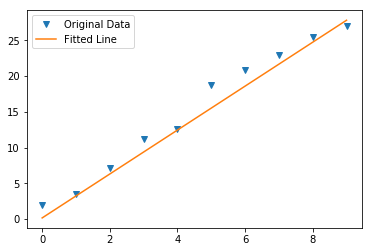

Loss:1.9980199337005615 at epoch: 600


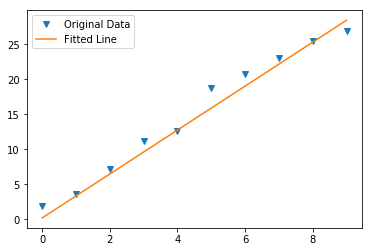

Loss:1.8336082696914673 at epoch: 700


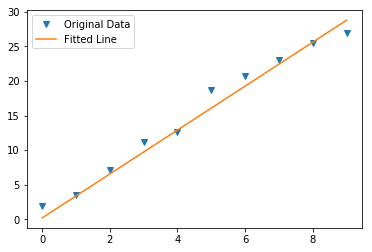

Loss:1.7777321338653564 at epoch: 800


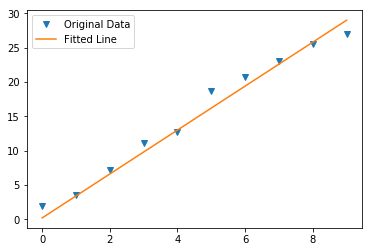

Loss:1.75552499294281 at epoch: 900


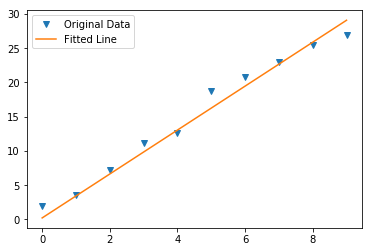

Loss:1.743801474571228 at epoch: 1000


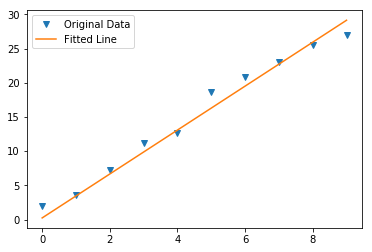

In [5]:
for epoch in range(1, 1001):
    y_pred = model(torch.from_numpy(x_train))
    loss = loss_fn(y_pred, torch.from_numpy(y_train))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Loss:{loss} at epoch: {epoch}')
        plt.plot(x_train, y_train, 'v', label='Original Data')
        plt.plot(x_train, y_pred.detach().numpy(), label='Fitted Line')
        plt.legend()
        plt.show()